In [78]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import PIL
import cv2 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [79]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [80]:
data_dir

'.\\datasets\\flower_photos'

In [81]:
import os 
correct_path = os.path.join(data_dir, "flower_photos")
if os.path.exists(correct_path):
    data_dir = correct_path
data_dir    

'.\\datasets\\flower_photos\\flower_photos'

In [82]:
image = plt.imread('datasets/flower_photos/flower_photos/daisy/5547758_eea9edfd54_n.jpg')
image.shape

(232, 320, 3)

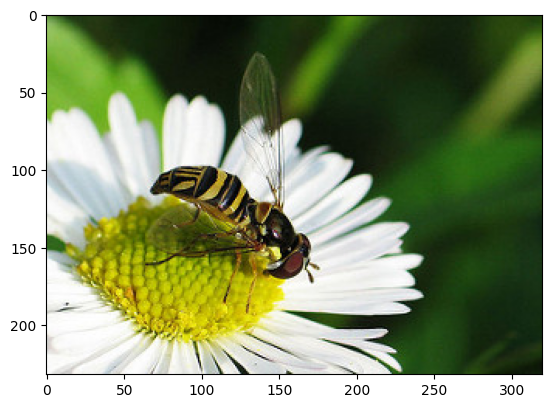

In [83]:
plt.imshow(image)

In [84]:
import pathlib
data_dir = pathlib.Path(data_dir) 
data_dir

WindowsPath('datasets/flower_photos/flower_photos')

In [85]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [86]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

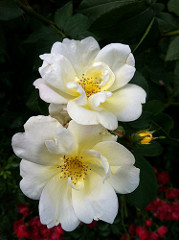

In [87]:
import PIL.Image


PIL.Image.open(roses[0])

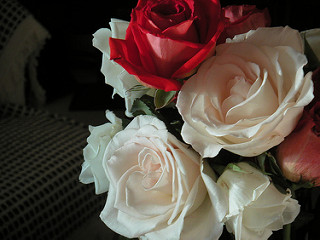

In [88]:
PIL.Image.open(roses[1])

In [89]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [90]:
flower_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [91]:
flower_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [92]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [93]:
cv2.resize(image,(180,180)).shape

(180, 180, 3)

In [94]:
X , y = [] , []
for flower_name,flower_images in flower_images_dict.items():
    for image in flower_images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(180,180))
        X.append(resized)
        y.append(flower_label_dict[flower_name])

In [95]:
X = np.array(X)
y = np.array(y)

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [97]:
print(X_train[0])

[[[ 68  79  77]
  [ 63  70  63]
  [ 60  62  56]
  ...
  [ 49  40  37]
  [ 48  39  36]
  [ 48  39  36]]

 [[ 57  62  60]
  [ 61  64  60]
  [ 60  61  55]
  ...
  [ 48  39  36]
  [ 48  39  36]
  [ 50  41  38]]

 [[ 61  58  57]
  [ 64  64  59]
  [ 59  59  53]
  ...
  [ 49  40  37]
  [ 49  40  37]
  [ 50  41  38]]

 ...

 [[ 49 121  93]
  [ 40  65  51]
  [ 52  96  67]
  ...
  [156 216 211]
  [161 216 212]
  [169 203 206]]

 [[ 48 119  90]
  [ 45  58  44]
  [ 50  91  60]
  ...
  [217 233 238]
  [201 212 215]
  [185 168 175]]

 [[ 54 121  95]
  [ 46  58  46]
  [ 46  89  60]
  ...
  [227 245 248]
  [219 201 204]
  [108  81  83]]]


In [98]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2752
2752
918
918


In [99]:
X_train = X_train / 255 # normalize images
X_test = X_test / 255

In [100]:
def predict(model,image_name):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convert to RGB

    plt.imshow(image,cmap=plt.cm.binary)

    prediction = model.predict(np.array([image]) / 255) # normalize input and predict
    index = np.argmax(prediction) # choose most probability in 10 output
    for name,label in flower_label_dict.items():
        if label == index:  
            print("Prediction:",name)
            break

In [101]:
model = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'), # (3x3) 16 filters 
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),

  Dense(128, activation='relu'),
  Dense(5,activation='softmax')
])
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [103]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [104]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 162ms/step - accuracy: 0.4164 - loss: 1.3766 - val_accuracy: 0.5523 - val_loss: 1.0991
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.6057 - loss: 1.0087 - val_accuracy: 0.6166 - val_loss: 0.9540
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.7005 - loss: 0.7909 - val_accuracy: 0.6547 - val_loss: 0.8867
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step - accuracy: 0.7758 - loss: 0.5749 - val_accuracy: 0.6492 - val_loss: 1.0125
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - accuracy: 0.8580 - loss: 0.3833 - val_accuracy: 0.6612 - val_loss: 1.0544
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9400 - loss: 0.1937 - val_accuracy: 0.6786 - val_loss: 1.0778
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.9671 - loss: 0.1168 - val_accuracy: 0.6623 - val_loss: 1.2810
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.9908 - loss: 0.0430 - val_accu

In [105]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6607 - loss: 0.8503
Loss:0.8867352604866028
Accuracy:0.6546840667724609


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Prediction: roses


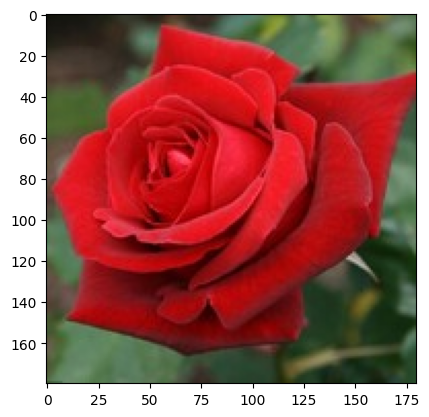

In [106]:
predict(model,'gul.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: roses


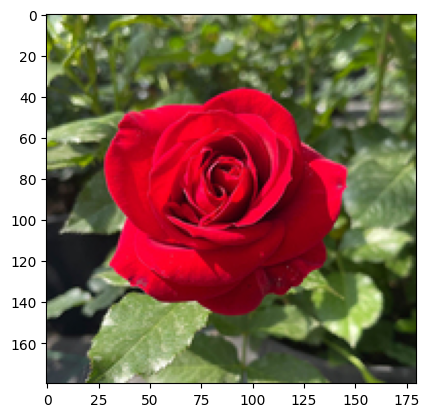

In [107]:
predict(model,'gul2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: daisy


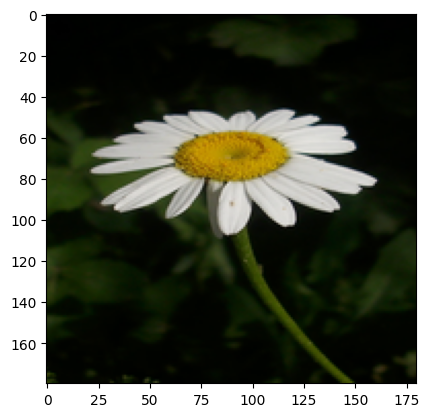

In [108]:
predict(model,'papatya.png')

In [109]:
train_images = []
train_labels = []
test_images = []
test_labels = []

for name,flower_images in flower_images_dict.items():
    for x in flower_images:
        train_images.append(str(x))
        train_labels.append(name)

train_images,test_images,train_labels,test_labels = train_test_split(train_images,train_labels,random_state=0)
print(len(train_images))
print(len(train_labels))
data = {
    'filepath' : train_images,
    'label' : train_labels
}
train_df = pd.DataFrame(data)

print(len(train_df))

train_data_gen = ImageDataGenerator(  # increase data and variety , avoid overfitting
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_data_gen.flow_from_dataframe(
    dataframe =  train_df,
    x_col='filepath',           
    y_col='label',              
    target_size=(180, 180),     # rescale images to 384x384          
    class_mode='categorical',   # Label type
    seed=42,                     
    shuffle=False              # shuffle data
)


2752
2752
2752
Found 2752 validated image filenames belonging to 5 classes.


In [110]:
data = {
    'filepath' : test_images,
    'label' : test_labels
}
test_df = pd.DataFrame(data)

print(len(test_df))

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_dataframe(
    dataframe =  test_df,
    x_col='filepath',           
    y_col='label',              
    target_size=(180, 180),     # rescale images          
    class_mode='categorical',   # Label type
    seed=42,                     
    shuffle=False                # shuffle data
)

918
Found 918 validated image filenames belonging to 5 classes.


In [111]:
model2 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'), # (3x3) 16 filters 
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),

  Dense(128, activation='relu'),
  Dense(5,activation='softmax')
])
model2.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [112]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [113]:
x_batch_train, y_batch_train = next(train_generator)
x_batch_test, y_batch_test = next(test_generator)

print("Train Data Shape:", x_batch_train.shape)
print("Train Labels Shape:", y_batch_train.shape)
print("Test Data Shape:", x_batch_test.shape)
print("Test Labels Shape:", y_batch_test.shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
len(train_generator)
len(test_generator)

Train Data Shape: (32, 180, 180, 3)
Train Labels Shape: (32, 5)
Test Data Shape: (32, 180, 180, 3)
Test Labels Shape: (32, 5)


29

In [114]:
model2.fit(train_generator,
           epochs=10,
           steps_per_epoch=len(train_generator),  
           validation_data=test_generator,
           validation_steps = len(test_generator),
           callbacks = [early_stopping])  

c:\Users\FURKAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 349ms/step - accuracy: 0.2391 - loss: 1.7935 - val_accuracy: 0.4390 - val_loss: 1.3268
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 313ms/step - accuracy: 0.4554 - loss: 1.2959 - val_accuracy: 0.5120 - val_loss: 1.2034
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.5760 - loss: 1.0951 - val_accuracy: 0.5915 - val_loss: 1.0455
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - accuracy: 0.5861 - loss: 1.0527 - val_accuracy: 0.6187 - val_loss: 0.9993
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.6076 - loss: 0.9911 - val_accuracy: 0.6438 - val_loss: 0.9325
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 0.6429 - loss: 0.9291 - val_accuracy: 0.6449 - val_loss: 0.9217
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.6467 - loss: 0.8845 - val_accuracy: 0.6383 - val_loss: 0.9372
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.6799 - loss: 0.8175 - val_accu

In [115]:
loss,accuracy = model2.evaluate(test_generator)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7190 - loss: 0.7484
Loss:0.7861748933792114
Accuracy:0.7015250325202942


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: dandelion


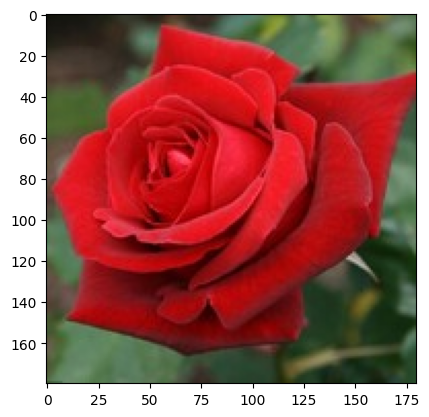

In [116]:
predict(model2,'gul.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: tulips


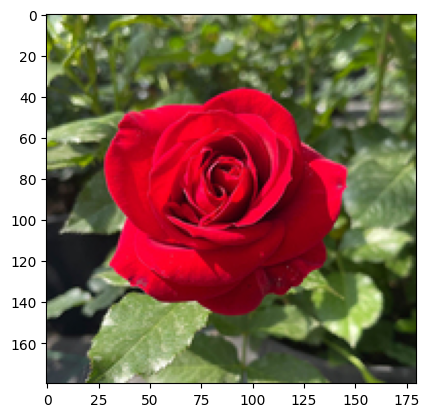

In [117]:
predict(model2,'gul2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: roses


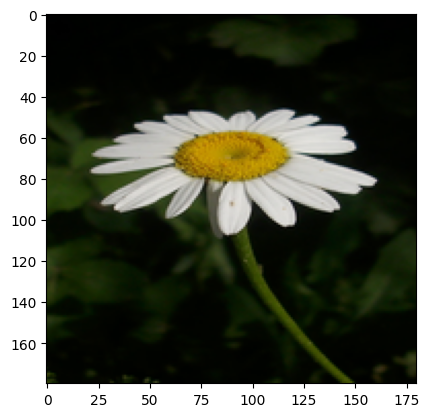

In [118]:
predict(model2,'papatya.png')

In [119]:
model3 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'), # (3x3) 16 filters 
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),

  Dense(128, activation='relu'),
  Dense(5,activation='softmax')
])
model3.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [140]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [141]:
model3.fit(train_generator,
           epochs=30,
           steps_per_epoch=len(train_generator),  
           validation_data=test_generator,
           validation_steps = len(test_generator),
           callbacks = [early_stopping])  

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.3726 - loss: 1.3855 - val_accuracy: 0.5588 - val_loss: 1.1063
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.5870 - loss: 1.0434 - val_accuracy: 0.6002 - val_loss: 0.9957
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 0.6344 - loss: 0.9152 - val_accuracy: 0.6100 - val_loss: 0.9403
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 191ms/step - accuracy: 0.6742 - loss: 0.8350 - val_accuracy: 0.6155 - val_loss: 1.0019
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - accuracy: 0.6903 - loss: 0.8071 - val_accuracy: 0.6950 - val_loss: 0.7891
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.6986 - loss: 0.7955 - val_accuracy: 0.6623 - val_loss: 0.8562
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 192ms/step - accuracy: 0.7356 - loss: 0.7251 - val_accuracy: 0.6895 - val_loss: 0.8374
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.7312 - loss: 0.7140 - val_accu

In [142]:
loss,accuracy = model3.evaluate(test_generator)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7856 - loss: 0.5541
Loss:0.5818021297454834
Accuracy:0.7799564003944397


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction: dandelion


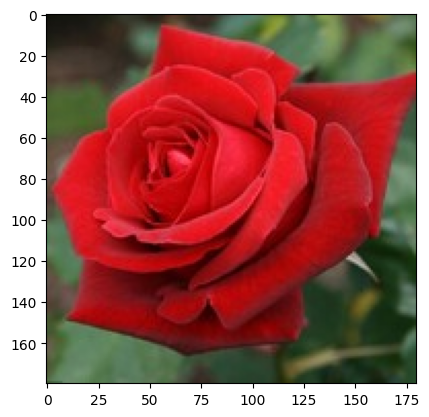

In [143]:
predict(model3,'gul.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction: dandelion


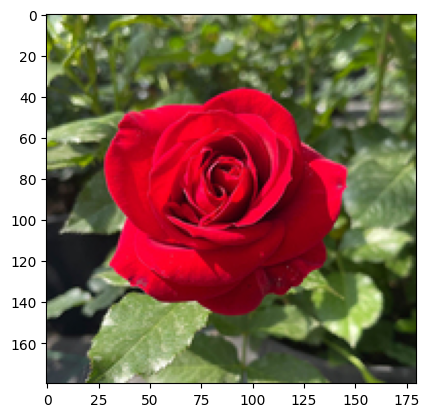

In [144]:
predict(model3,'gul2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: roses


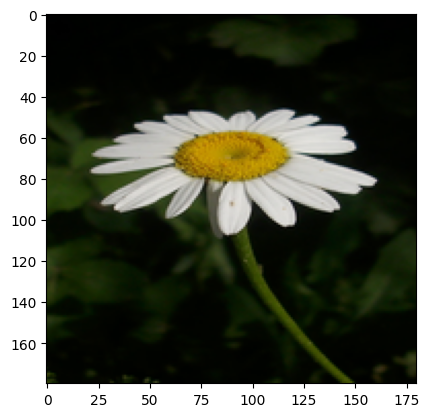

In [145]:
predict(model3,'papatya.png')

In [169]:
import tensorflow_hub as hub
from tensorflow.keras.layers import GlobalAveragePooling2D,Input

In [178]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Base modeli yükle
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
base_model.trainable = False

# Yeni model oluştur
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(5, activation='softmax')(x)

# Final model
model4 = Model(inputs=base_model.input, outputs=predictions)

C:\Users\FURKAN\AppData\Local\Temp\ipykernel_17712\1185871074.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


In [179]:
model4.compile(
  optimizer="adam",
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [180]:
model4.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.5309 - loss: 1.1970 - val_accuracy: 0.7778 - val_loss: 0.6021
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.8384 - loss: 0.4813 - val_accuracy: 0.8050 - val_loss: 0.5149
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 180ms/step - accuracy: 0.8714 - loss: 0.3746 - val_accuracy: 0.8148 - val_loss: 0.5126
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.8983 - loss: 0.3300 - val_accuracy: 0.8192 - val_loss: 0.4864
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.8906 - loss: 0.3101 - val_accuracy: 0.8312 - val_loss: 0.4379
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.9294 - loss: 0.2495 - val_accuracy: 0.8410 - val_loss: 0.4394
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 189ms/step - accuracy: 0.9442 - loss: 0.2165 - val_accuracy: 0.8388 - val_loss: 0.4295
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.9368 - loss: 0.2066 - val_accu

In [182]:
loss,accuracy = model4.evaluate(X_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.8447 - loss: 0.4241
Loss:0.4285849332809448
Accuracy:0.8453159332275391


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
Prediction: roses


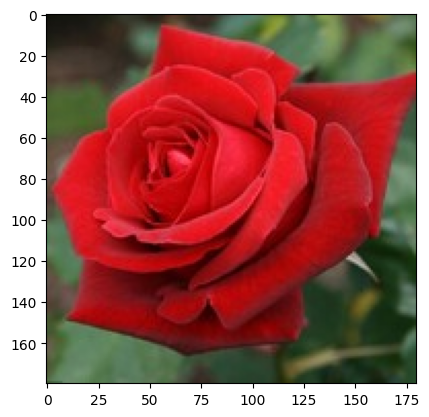

In [183]:
predict(model4,'gul.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: roses


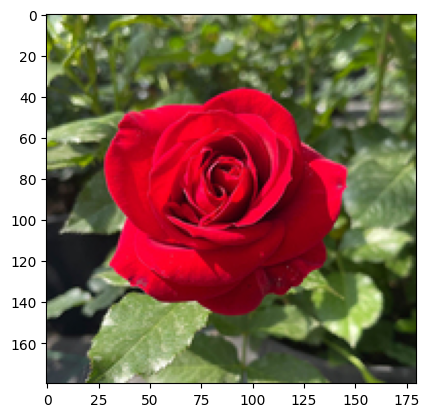

In [184]:
predict(model4,'gul2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: daisy


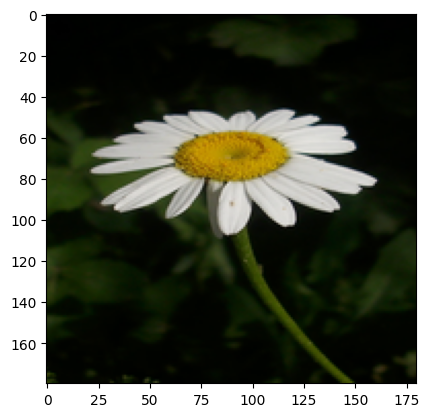

In [186]:
predict(model4,'papatya.png')